<div style="width: 100%; overflow: hidden;">
    <div style="width: 150px; float: left;"> <img src="data/D4Sci_logo_ball.png" alt="Data For Science, Inc" align="left" border="0"> </div>
    <div style="float: left; margin-left: 10px;"> <h1>Transforming Excel Analysis into pandas Data Models</h1>
<h1>Advanced Excel Spreadsheets</h1>
        <p>Bruno Gonçalves<br/>
        <a href="http://www.data4sci.com/">www.data4sci.com</a><br/>
            @bgoncalves, @data4sci</p></div>
</div>

In [1]:
from collections import Counter
from pprint import pprint

import pandas as pd
import numpy as np

import matplotlib
import matplotlib.pyplot as plt 

from sklearn.linear_model import LinearRegression

import openpyxl
from openpyxl.drawing.image import Image
from openpyxl.chart import ScatterChart, Reference, Series
from openpyxl.utils.dataframe import dataframe_to_rows

import watermark

%load_ext watermark
%matplotlib inline

We start by print out the versions of the libraries we're using for future reference

In [2]:
%watermark -n -v -m -g -iv

autopep8   1.5
openpyxl   3.0.5
matplotlib 3.1.3
watermark  2.0.2
numpy      1.18.1
pandas     1.0.1
json       2.0.9
Wed Sep 02 2020 

CPython 3.7.3
IPython 6.2.1

compiler   : Clang 4.0.1 (tags/RELEASE_401/final)
system     : Darwin
release    : 19.6.0
machine    : x86_64
processor  : i386
CPU cores  : 8
interpreter: 64bit
Git hash   : 00fa09128f296bb2b7d4858d993e4db3654af99c


Load default figure style

In [3]:
plt.style.use('./d4sci.mplstyle')

## Formulas

In [4]:
book = openpyxl.Workbook()
sheet = book.active
sheet.title = 'Formulas'

Confirm that the sheet is empty

In [5]:
sheet.dimensions

'A1:A1'

Let's add some data

In [6]:
sheet['A1'] = 'x'
sheet['B1'] = 'y'

rows = np.arange(20).reshape(10, 2)

for row in rows:
    sheet.append(list(row)) # Rows have to be lists or tuples

In [7]:
sheet.dimensions

'A1:B11'

Now we're going to a simple formula for the totals at the bottom of the values we just added

In [8]:
sheet['A12'] = "=SUM(A2:A11)"
sheet['B12'] = "=SUM(B2:B11)"

And finally we can save our new workbooks

In [9]:
book.save('data/Advanced.xlsx')

In [10]:
!open data/Advanced.xlsx

In [11]:
sheet['B12'].value

'=SUM(B2:B11)'

All the function names that openpyxl knowns about

In [12]:
print(openpyxl.utils.FORMULAE)

frozenset({'ISPMT', 'FTEST', 'MDURATION', 'AMORLINC', 'PRODUCT', 'QUOTIENT', 'MROUND', 'CUBESETCOUNT', 'TIME', 'IMDIV', 'ACCRINTM', 'ISNONTEXT', 'IMLOG2', 'DGET', 'BESSELK', 'INFO', 'VLOOKUP', 'SLOPE', 'COUPDAYSNC', 'TRANSPOSE', 'EVEN', 'ISREF', 'VARP', 'SEARCH', 'COVAR', 'OR', 'FACT', 'PERCENTILE', 'PPMT', 'DOLLARFR', 'ROWS', 'DAY', 'DAVERAGE', 'MAX', 'CHITEST', 'TBILLPRICE', 'STANDARDIZE', 'IMCOS', 'VDB', 'COLUMNS', 'DCOUNTA', 'PRICEDISC', 'INDIRECT', 'SEARCHB', 'COSH', 'ISNA', 'KURT', 'FIND', 'LINEST', 'SQRTPI', 'TBILLYIELD', 'SMALL', 'FACTDOUBLE', 'TAN', 'HLOOKUP', 'EFFECT', 'MATCH', 'CRITBINOM', 'TINV', 'BAHTTEXT', 'MINUTE', 'ROUND', 'REPLACE', 'COMPLEX', 'CUMIPMT', 'NORMDIST', 'TRUE ADDRESS', 'AVERAGEIF', 'SQRT', 'IMABS', 'PV', 'IMCONJUGATE', 'HYPERLINK', 'NETWORKDAYS', 'ZTEST', 'ISODD', 'EXPONDIST', 'ERROR.TYPE', 'DATEVALUE', 'DSUM', 'NEGBINOMDIST', 'DEVSQ', 'BESSELJ', 'SERIESSUM', 'ASC', 'TODAY', 'YIELDDISC', 'MONTH', 'FINDB', 'CUBEMEMBER', 'RAND', 'N', 'PI', 'QUARTILE', 'RIGHT

## Images

Now we will create a new worksheet where we will add a few images

In [13]:
sheet = book.create_sheet(title='Images')

In [14]:
sheet['A1'] = 'Our logo'

In [15]:
img = Image('data/D4Sci_logo_full.png')

In [16]:
sheet.add_image(img, 'B1')

In [17]:
book.save('data/Advanced.xlsx')

In [18]:
!open data/Advanced.xlsx

Now let's try doing something slightly more useful. We'll read a data file from disk, perform a linear fit, generate a plot and add it to the workshet

In [19]:
data = pd.read_csv('data/Anscombe1.dat', header=None, sep=' ')

In [20]:
data.shape

(11, 2)

In [21]:
sheet['A31'] = 'X'
sheet['B31'] = 'Y'

In [22]:
for x, y in data.values:
    sheet.append((x, y))

In [23]:
lm = LinearRegression()
lm.fit(data[[0]], data[[1]])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [24]:
y2 = lm.predict(data[[0]])

In [25]:
lm.intercept_

array([3.00009091])

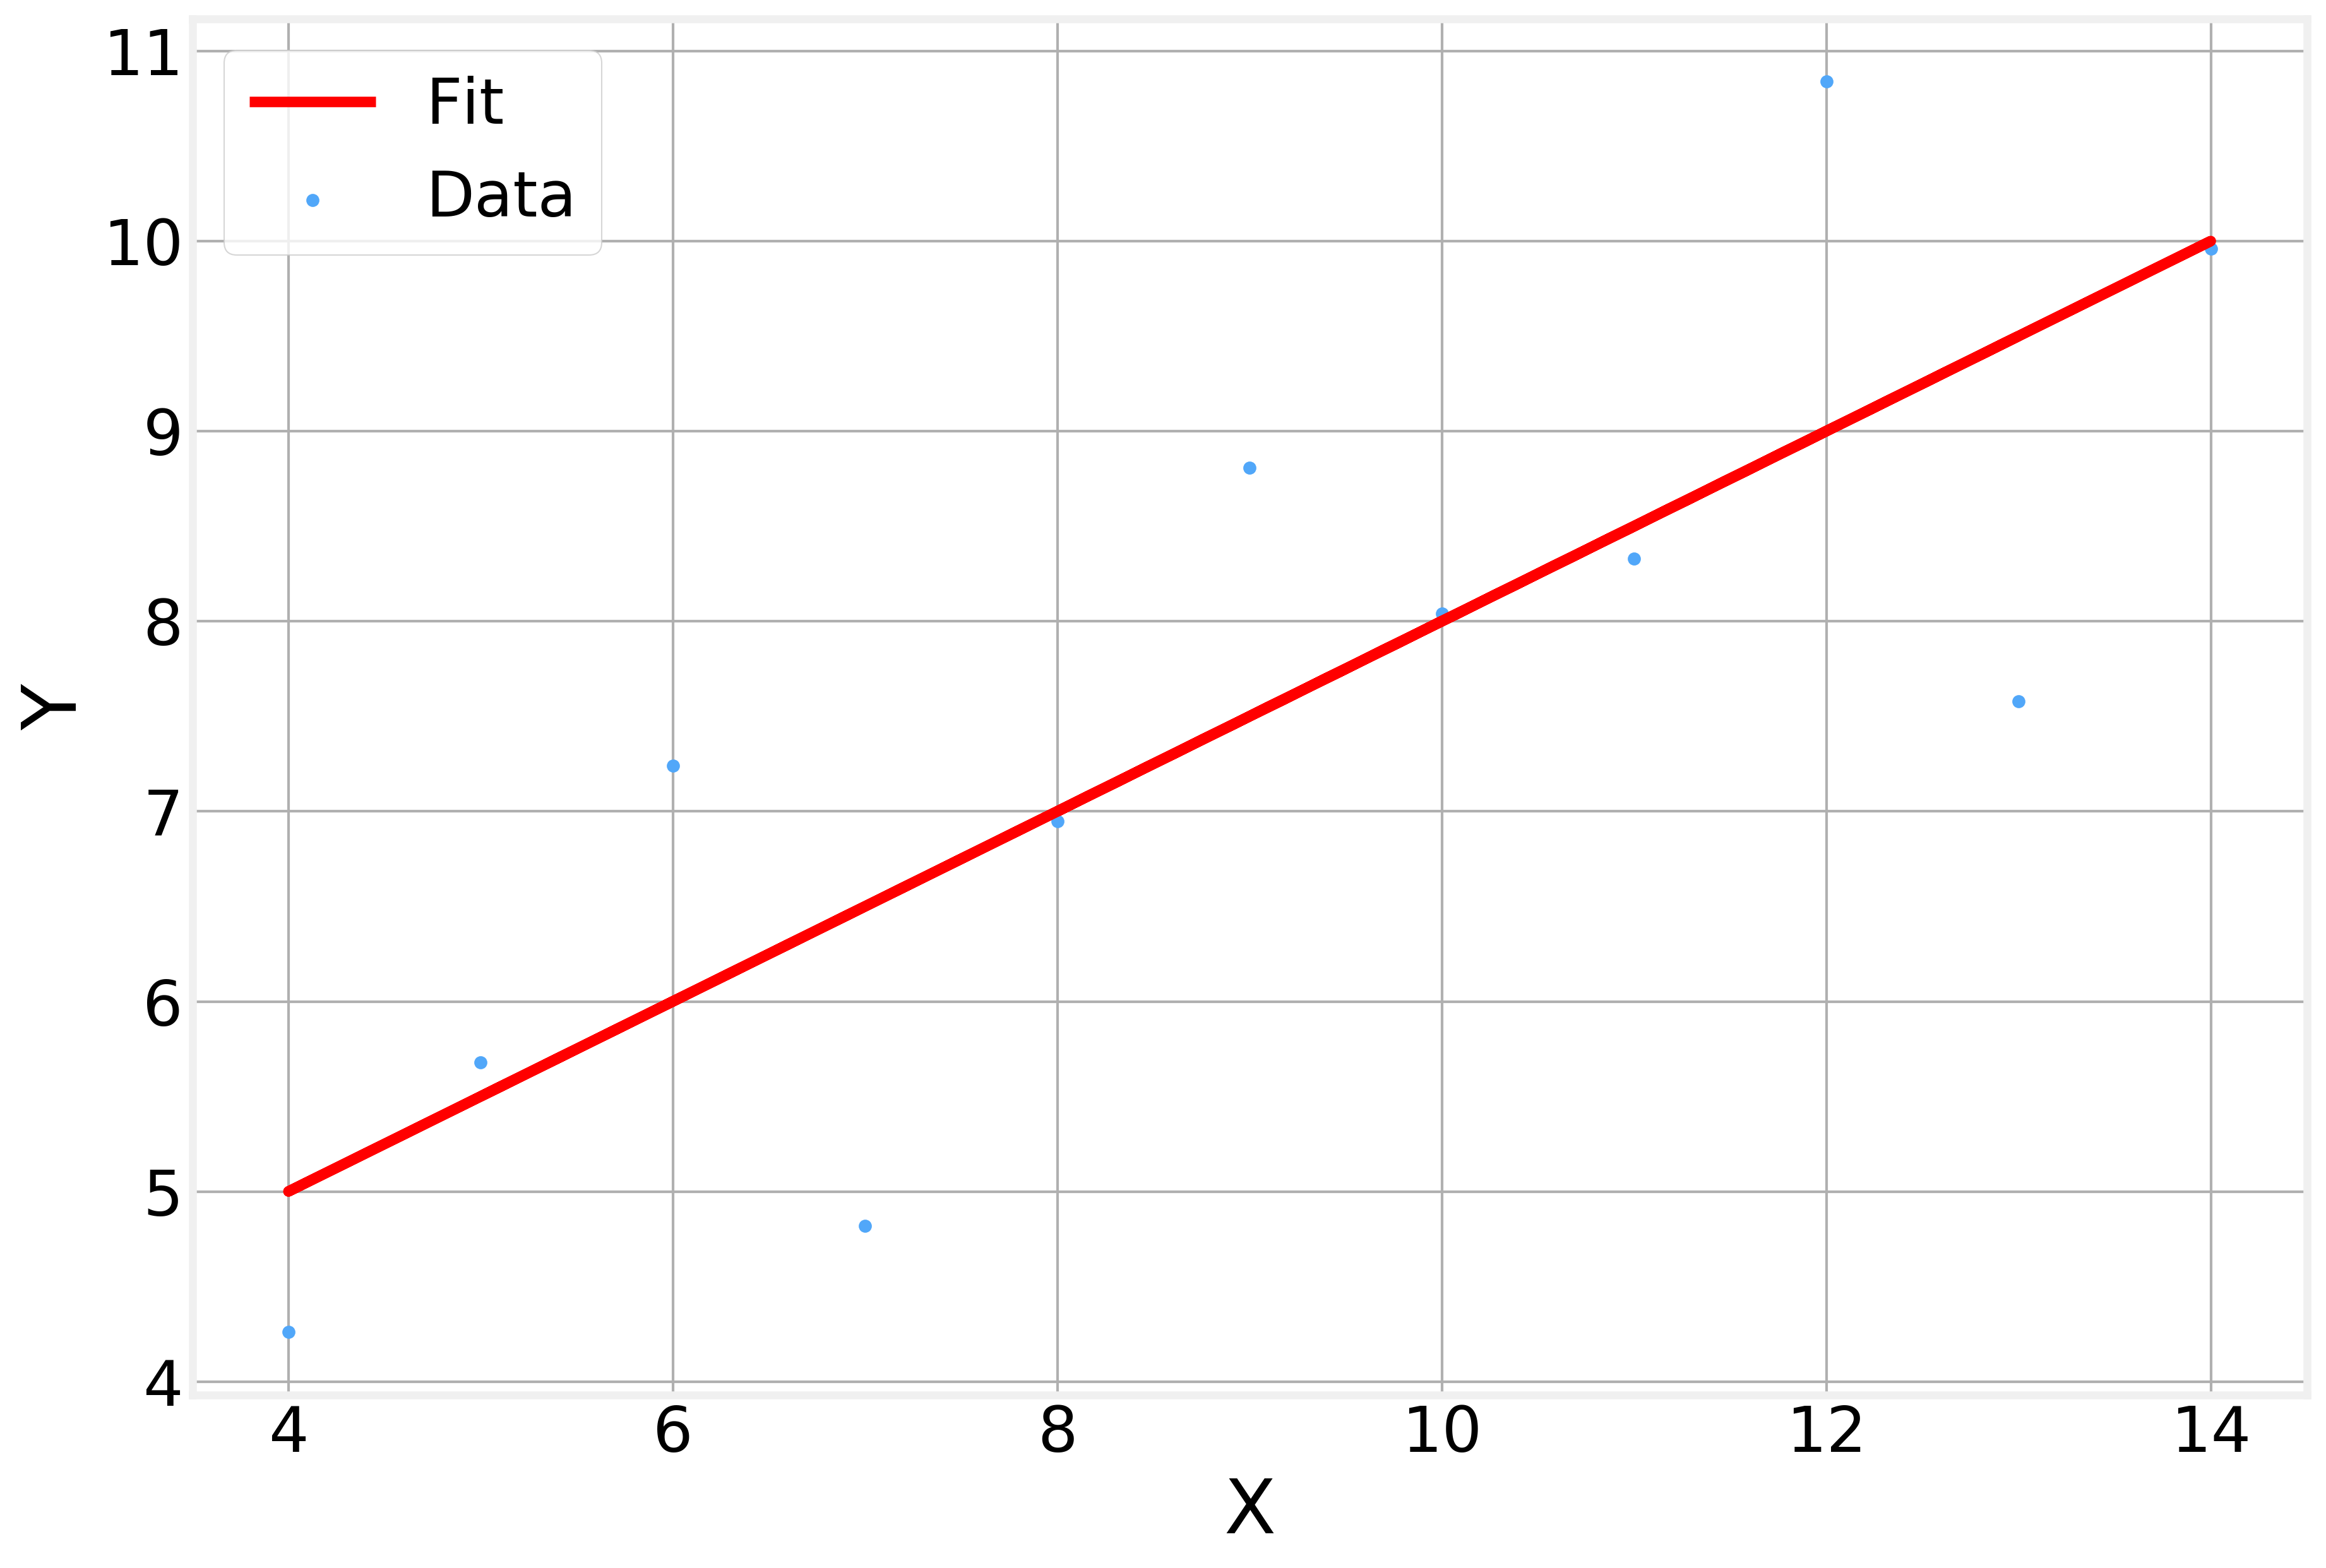

In [26]:
ax = data.plot.scatter(x=0, y=1, label='Data')
ax.plot(data[0], y2, c='r', label='Fit')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.legend()
plt.savefig('data/Anscombe.png', dpi=72)

And now we can add it to the worksheet

In [27]:
img = Image('data/Anscombe.png')

In [28]:
sheet.add_image(img, 'D31')

In [29]:
book.save('data/Advanced.xlsx')

In [30]:
!open data/Advanced.xlsx

## Charts

In [31]:
sheet = book.create_sheet(title="Charts")

In [32]:
data[2] = y2

In [33]:
sheet['A1'] = 'X'
sheet['B1'] = 'Y'
sheet['C1'] = 'Fit'

for x, y, z in data.values:
    sheet.append((x, y, z))

In [34]:
chart = ScatterChart()
chart.title = "Line Chart"
chart.y_axis.title = 'Y'
chart.x_axis.title = 'X'

In [35]:
x_ref = Reference(sheet, min_col=1, min_row=2, max_row=12) # X-values start in row 2 to skip the column title
y_ref = Reference(sheet, min_col=2, min_row=1, max_row=12)
y2_ref = Reference(sheet, min_col=3, min_row=1, max_row=12)

In [36]:
series_y = Series(values=y_ref, xvalues=x_ref, title_from_data=True)#, title='Y')
series_y2 = Series(values=y2_ref, xvalues=x_ref, title_from_data=True)#, title='Fit')

In [37]:
series_y.graphicalProperties.line.noFill = True
series_y.marker.symbol = 'square'

In [38]:
chart.series.append(series_y)
chart.series.append(series_y2)

In [39]:
sheet.add_chart(chart, "D1")

In [40]:
book.save('data/Advanced.xlsx')

In [41]:
!open data/Advanced.xlsx

## Pandas support

In [42]:
data.columns = ['X', 'Y', 'Fit']

In [43]:
sheet = book.create_sheet('Pandas')

In [44]:
for row in dataframe_to_rows(data, header=True, index=True):
    sheet.append(row)

In [45]:
book.save('data/Advanced.xlsx')

In [46]:
!open data/Advanced.xlsx

And to extract the data back from a Worksheet

In [47]:
new_data = np.array([row for row in sheet.values])

In [48]:
new_data[1:]

array([[None, None, None, None],
       [0, 10.0, 8.04, 8.001000000000001],
       [1, 8.0, 6.95, 7.000818181818183],
       [2, 13.0, 7.58, 9.50127272727273],
       [3, 9.0, 8.81, 7.500909090909093],
       [4, 11.0, 8.33, 8.501090909090912],
       [5, 14.0, 9.96, 10.001363636363639],
       [6, 6.0, 7.24, 6.000636363636365],
       [7, 4.0, 4.26, 5.000454545454547],
       [8, 12.0, 10.84, 9.00118181818182],
       [9, 7.0, 4.82, 6.500727272727274],
       [10, 5.0, 5.68, 5.500545454545456]], dtype=object)

In [49]:
df = pd.DataFrame(new_data[2:], columns=new_data[0])
df.set_index(df.columns[0])

,X,Y,Fit
0,10,8.04,8.001
1,8,6.95,7.00082
2,13,7.58,9.50127
3,9,8.81,7.50091
4,11,8.33,8.50109
5,14,9.96,10.0014
6,6,7.24,6.00064
7,4,4.26,5.00045
8,12,10.84,9.00118
9,7,4.82,6.50073


<div style="width: 100%; overflow: hidden;">
     <img src="data/D4Sci_logo_full.png" alt="Data For Science, Inc" align="center" border="0" width=300px> 
</div>